# Laboratory 00 - Statistics Review

## MAE 3120, Spring 2021

# Basic definitions for data analysis using statistics

### Population
The entire collection of measurements, not all of which will be analyzed statistically.

### Sample
A subset of the population that is analyzed statistically.

### Statistic
A numerical attribute of the sample(e.g., mean, median, standard deviation).

### Import data from file for statistical analysis

In [1]:
# Import NumPy library
import numpy as np

# Import temperature sample(in Celsius) in an array - 1000 measurements 
Temp = np.loadtxt("data/Temperature_Data.csv", delimiter = ',', skiprows = 1, usecols = 1, unpack = True) 

n = np.size(Temp) # Number of measurements of the sample

### Sample mean

The arithmetic average calculated with 
\begin{align*}
\large
\bar{x} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} x_i
\end{align*}

where $i$ is one of the n measurements of the sample.

**Note:** The mean and median are measures of the **central tendency** of a set of measurements - i.e.the tendency of the data to cluster, center about certain numerical values.

In [2]:
Tmean = np.round(np.mean(Temp), 3)
print(Tmean)

31.009


### Median 

Median of a sample is the value at which half of the measurements are lower and half are higher.

Once the measurements are order from lower to higher: 
- If n is odd: Number in the middle is the median.
- If n is even: Average of two middle values is the median.

Sometimes the median is __more useful__ than the mean, especially when one or two values are significantly different than the others.The median is __less sensitive__ to extremely large or small measurements.

In [3]:
# Create a sample with outliers
sample = np.array([4, 4, 6, 6, 4, 3, 7, 20, 20])

In [4]:
Mean = np.mean(sample)
print('Sample mean', Mean)

Sample mean 8.222222222222221


In [5]:
Median = np.median(sample)
print('Sample median', Median)

Sample median 6.0


### Mode

The most probable value of the n measurements.The one that occurs more frequently.

### Numerical measures of variability
In order to achieve a complete description of our data, we do not only need measures of central tendency, but also measures of variability or spread of the data set.

### Deviation of a measurement

The difference between a particular measurement and the mean, i.e., for measurement $i$


\begin{align*}
\large
d_i = x_i - \bar{x}
\end{align*}

The deviation of one particular measurement is the same as the _precision_ or _random_ error of that measurement.

In [6]:
deviation = Temp - Tmean
# print(deviation)

### How much deviation is represented in the sample? 

### Average deviation

We can obtain an average of the deviations.However, the average of all the deviations is **zero**! Some measurements are smaller and some larger than the average.

Thus, this is not a particularly useful statistic.


In [7]:
np.mean(deviation) 

0.0003199999999995917

### Average absolute deviation

A better measure of deviation - The average of the absolute value of each deviation

\begin{align*}
\large
| \bar{d} | = \frac{1}{n} \displaystyle\sum_{i=1}^{n} |d_i |
\end{align*}


where $d_i$ is called the absolute deviation or positive error.

In [8]:
Absdeviation = abs(deviation)
Avabsdeviation = np.mean(Absdeviation)
print(Avabsdeviation)

1.186884


### Sample standard deviation

Better measure of how much deviation or scatter exist in the data.

\begin{align*}
\large
S = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} {d_i}^ 2}{n - 1} } = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} {(x_i - \bar{x})}^ 2}{n - 1} } 
\end{align*}


In [9]:
Stdeviation = np.std(Temp)
print(Stdeviation)

1.4873070757580629


### Sample variance

The square root of the sample standard deviation.

\begin{align*}
\large
sample \ variance = S^2
\end{align*}



In [10]:
variance = np.var(Temp)
print(variance)

2.2120823376


### Standard error

The standard deviation divided by the square root of the number of measurements

\begin{align*}
\large
standard \ error = \frac{S}{\sqrt {n}}
\end{align*}

In [11]:
sterror = Stdeviation / np.sqrt(np.size(Temp))
print(sterror)

0.047032779394800814


# Histograms

![Histogram characteristics](img/img_00/Histogram.png)

Histograms are constructed by divvying up the _n_ measurements of a sample into _J_ **bins or intervals or classes** such that for the first bin 

\begin{align*}
\large
( \ j=1 \ ), \ x_1 < x \le x_2,
\end{align*}

for the second bin 
\begin{align*}
\large
(\ j=2 \ ), \ x_2 < x \le x_3,
\end{align*}

etc.

The **middle value** of $x$ in bin $j$ is defined as $x_{mid,j}$: 

E.g.for the second bin $( \ j=2 \ )$:
\begin{align*}
\large
x_{mid,2} =(\ x_2 + x_3 \)/ \ 2
\end{align*}

The **bin width** is usually constant, although it does not have to be.

Eventually, a **bar plot** is made of the frequency - the number of measurements in each bin versus the value of x.

### How to determine the number of bins?

There are some general rules of thumb for the selection of the number of bins to be used in a histogram.

### Sturgis rule
\begin{align*}
\large
J = 1 + 3.3 \log_{10} n
\end{align*}

where $n$ is the total number of measurements in the sample and and $J$ is the number of bins or intervals in the histogram

### Rice rule

\begin{align*}
\large
J = 2n^{1/3}
\end{align*}

For small number of $n$ measurements, the two rules yield **similar** results.

5 bins is the generally accepted **minimum** number of bins in a histogram.

In general, we should use between 5 and 20 bins for a histogram.Of course, we can experiment with the number of bins and choose the one that yields the **most meaningful histogram**.

In [12]:
# Sturgis rule 
def Sturgis(n):
    J = int(round(1 + 3.3 * np.log10(n)))
    return J

def Rice(n):
    J = int(round(2 * (n ** (1 / 3))))
    return J

In [13]:
BRice = Rice(n)
BSturgis = Sturgis(n)

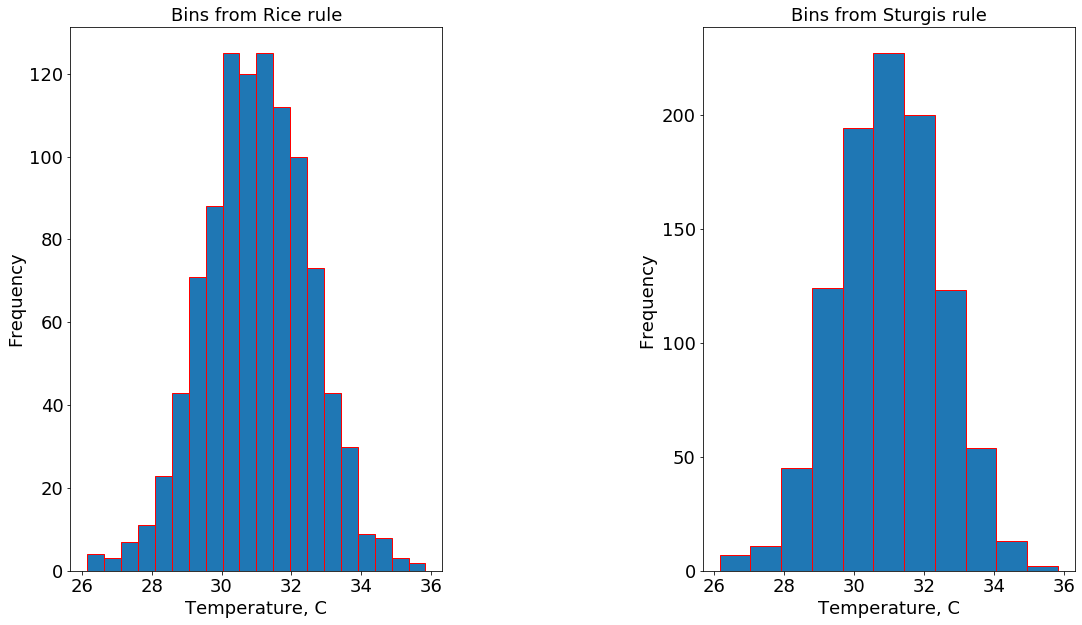

In [14]:
from matplotlib import pyplot
%matplotlib inline

font = 18
pyplot.figure(figsize=(18, 10))
Riceplot = pyplot.subplots_adjust(wspace = 0.7)
pyplot.subplot(121)
pyplot.hist(Temp, bins = BRice, edgecolor = 'r') # You can also specify the bin edges with an array containing them
pyplot.ylabel('Frequency' ,fontsize=font)
pyplot.xlabel('Temperature, C', fontsize=font)
pyplot.title('Bins from Rice rule', fontsize=font)
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font)

Sturgisplot = pyplot.subplot(122)
pyplot.hist(Temp, bins = BSturgis, edgecolor = 'r')
pyplot.ylabel('Frequency ', fontsize=font)
pyplot.xlabel('Temperature, C', fontsize=font)
pyplot.title('Bins from Sturgis rule', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

Another way to build the histogram - This function will generate the bin edges array and the frequency array

In [15]:
freq, bin_edges = np.histogram(Temp, bins= 15, weights=None)

The sum of the frequency array must be equal to the number of measurements

In [16]:
np.sum(freq)

1000

Alternatively, we can tailor the bin edges values by creating an array that contains them 

In [17]:
spec_bin_edges =([28, 29, 30, 31, 32, 33, 34])

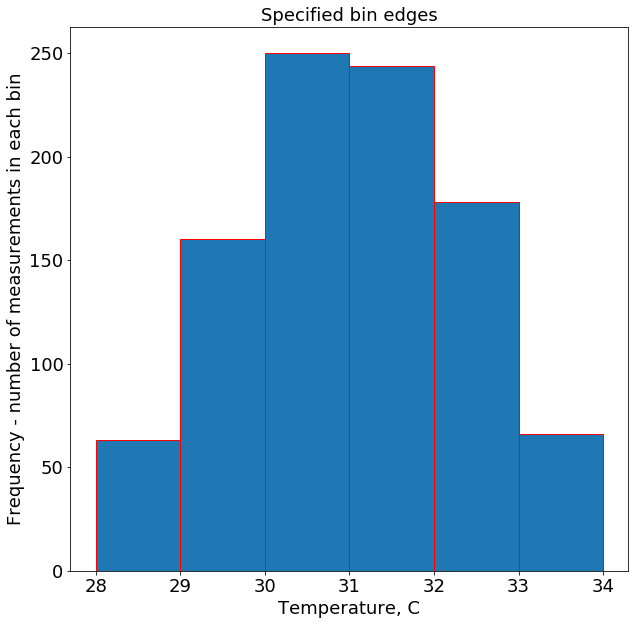

In [18]:
Binedges = pyplot.figure(figsize=(10, 10))
pyplot.hist(Temp, bins = spec_bin_edges, edgecolor = 'r')
pyplot.ylabel('Frequency - number of measurements in each bin', fontsize=font)
pyplot.xlabel('Temperature, C', fontsize=font)
pyplot.title('Specified bin edges', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

### Probability histograms and normalized histograms

The frequency axis can be converted to a **relative frequency axis** or **probability** by dividing with the total number of measurements $n$, such that

for the second bin 
\begin{align*}
\large
probability_j = \frac {number \ of \ measurements \ in \  bin \ j}{n}
\end{align*}

![Probability histogram](img/img_00/probhistogram.png)


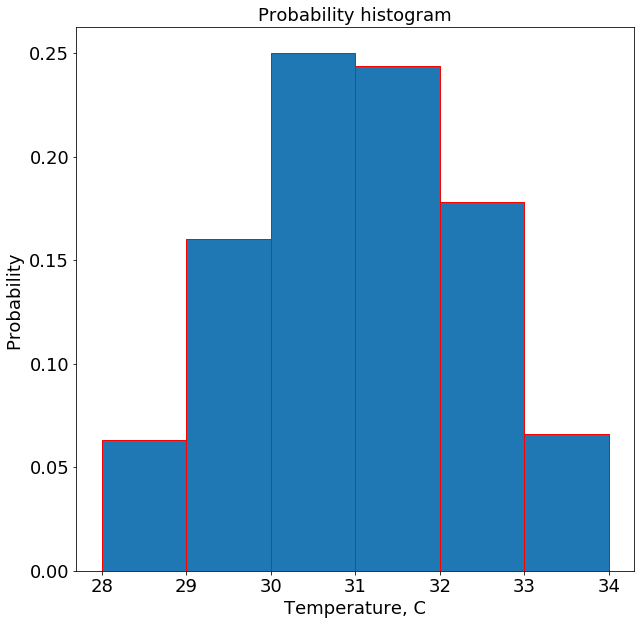

In [19]:
Probplot = pyplot.figure(figsize=(10, 10))
pyplot.hist( Temp, bins = spec_bin_edges, weights = np.zeros_like(Temp) + 1./ Temp.size, edgecolor = 'r')
pyplot.ylabel('Probability ', fontsize=font)
pyplot.xlabel('Temperature, C', fontsize=font)
pyplot.title('Probability histogram', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

A vertically normalized histogram can be created by further dividing the probability axis by the bin width: 

\begin{align*}
\large
f \ (\ x_{mid,j} \ )= \frac{probability_j}{Δx_j} = \frac{number \ of \ measurements \ in \ bin \ j}{n \ Δx_j}
\end{align*}

This simply quarantees **mathematically** that the area of the bin is **equal** to the probability that x lies in that bin

In our case the bin width is equal to unity, so the probability and vertically normalized histogram are identical.

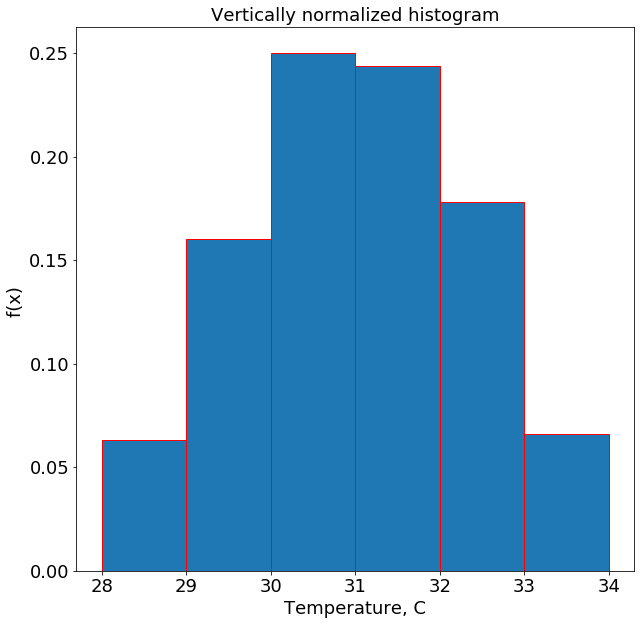

In [20]:
Normalizedplot = pyplot.figure(figsize=(10, 10))
pyplot.hist(Temp, bins = spec_bin_edges, weights = np.zeros_like(Temp) + 1 / Temp.size, edgecolor = 'r')

pyplot.ylabel('f(x) ', fontsize=font)
pyplot.xlabel('Temperature, C', fontsize=font)
pyplot.title('Vertically normalized histogram', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

### Different types of histograms

![Histogram types](img/img_00/histogramtypes.png)

# Probability density functions

A probability density function(PDF) is built by fitting a smooth curve through the vertically normalized histogram.

![PDF](img/img_00/PDF.png)

You can think of a PDF as the smooth limit of a vertically normalized histogram if there were millions of measurements and a huge number of bins.

The main difference:
- Histogram - Discrete data
- PDF - Continuous data


The PDF $f(x)$ is defined mathematically as

\begin{align*}
\large
f(x_i) = \frac{P(x_i-\frac{dx}{2} < x \le x_i + \frac{dx}{2})}{dx}
\end{align*}

For the given infinitesimal range __the integral under the PDF curve is the probability that a measurement lies within that range__.

![PDFarea](img/img_00/PDFarea.png)

Suppose we choose a range of our variable x, between $a$ and $b$.The probability that a measurement lies between $a$ and $b$ is simply the integral under the PDF curve between $a$ and $b$, where the probability is defined as 

\begin{align*}
\large
P(a < x \le b)= \int_{x = a}^{x = b} f(x) dx
\end{align*}

Obvisously, 

\begin{align*}
\large
P(- \infty < x \le + \infty)= \int_{x = - \infty}^{x = + \infty} f(x) dx = 1
\end{align*}


From now on we depart from discrete random variables and deal with continuous random variables

### Expected value

In terms of the probability density function, the expected value is the __mean of all possible x values in the continuous system__.

Namely, the expected value is 

\begin{align*}
\large
\mu = E(x) = \int_{-\infty}^{+\infty} x \ f(x)dx
\end{align*}

If, ideally,  $f(x)$ **exactly** represents the population, $\mu$ is the **mean of the entire population** of $x$ values.

In general, 

\begin{align*}
\large
 \bar{x} \neq \mu , 
 \end{align*}
 
 but 
 
\begin{align*}
\large
\bar{x} \rightarrow \mu
\end{align*}

when $n$ is very large.


### Standard deviation in terms of PDF

\begin{align*}
\large
\sigma = \sqrt{\int_{-\infty}^{+\infty}(x-\mu)^2 \ f(x)dx} 
\end{align*}

Again, if $f(x)$ exactly represents the population, $\sigma$ is the **standard deviation of the entire population**.

If $n$ is large, 

\begin{align*}
\large
S \rightarrow \sigma
\end{align*}

## Normalized PDF

Normalize by transforming both axes of the PDF plot, so that we can compare to **standard PDFs**.

### Horizontal axis transformation

\begin{align*}
\large
z = \frac{x - \mu}{\sigma}
\end{align*}

Normalized such that the PDF is centered around z = 0.

### Vertical axis transformation 
\begin{align*}
\large
f(z) = \sigma \ f(x)
\end{align*}

Normalized such that the PDF is spread in a similar fashion regardless of the standard deviation value.




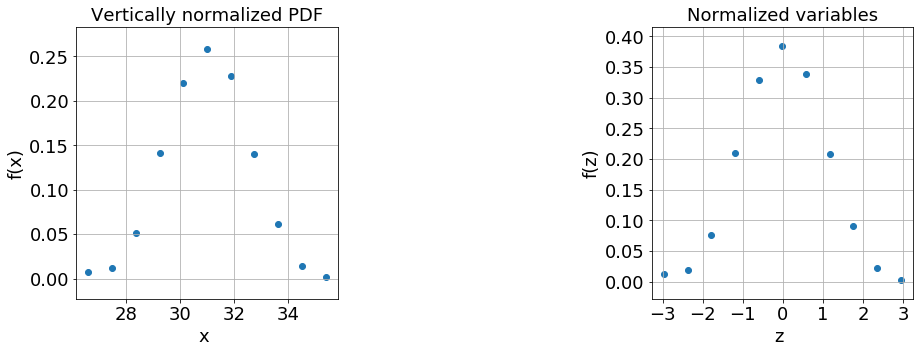

In [21]:
# Use the histogram constructed with bins from the Sturgis rule
freq, bin_edges = np.histogram(Temp, bins=BSturgis, range=None, normed=None, weights=None, density=None)

# Calculate the probability values
prob = freq / n 

# Calculate the vertically normalized function values
PDFyaxis = prob /(bin_edges[1]-bin_edges[0])

# Calculate the midpoints of each bin's interval
PDFxaxis = np.zeros(bin_edges.size - 1)
i = 0
for j in np.arange(0,11):  
    PDFxaxis [i] = (bin_edges[i + 1]+ bin_edges[i ]) / 2
    i = i + 1
    
# Normalize the x-axis
zvalues = (PDFxaxis - Tmean) / Stdeviation

# Normalize the y-axis
fzvalues = Stdeviation * PDFyaxis

PDFnormal = pyplot.figure(figsize=(15, 5))

pyplot.subplots_adjust(wspace = 1.2)
pyplot.subplot(121)
pyplot.grid(True)
pyplot.scatter(PDFxaxis, PDFyaxis)
pyplot.ylabel('f(x)', fontsize=font)
pyplot.xlabel('x ', fontsize=font)
pyplot.title('Vertically normalized PDF', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

pyplot.subplot(122)
pyplot.grid(True)
pyplot.scatter(zvalues, fzvalues)
pyplot.ylabel('f(z)', fontsize=font)
pyplot.xlabel('z ', fontsize=font)
pyplot.title('Normalized variables', fontsize=font);
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

# The Gaussian or Normal Probability Density Function

The vertically normalized PDF that is produced from a signal or measurement that has purely random errors.

![Normal](img/img_00/Normal.png)


\begin{align*}
\large
f(x) = \frac{1}{\sigma \sqrt {2 \pi}} \ exp {(\frac{-(x - \mu)^2}{2 \ \sigma^2}) }
\end{align*}

Some properties: 

- Symmetric about the mean 
- The mean and median are both equal to $\mu$, the expected value
- Its plot is called a "bell curve " 
- The actual shape depends on the standard deviation magnitude

### Standard normal density function


All Gaussian PDFs can be collapsed into _one normalized curve_ through the variable transformations.The normalized curve is called **standard normal density function**.

\begin{align*}
\large
z = \frac{x - \mu}{\sigma}
\end{align*}

\begin{align*}
\large
f(z) = \sigma \ f(x)
\end{align*}

\begin{align*}
\large
f(z) = \sigma \ f(x) = \frac{1}{\sqrt {2 \pi}} \ exp {(\frac{- z^2}{2 }) }
\end{align*}

![NormNormal](img/img_00/NormNormal.png)


This standard density function is valid for any signal measurement, __provided that the errors(deviations) are purely random__.

It holds that 

\begin{align*}
\large
P(x_1 < x \le x_2) = P(z_1 < z \le z_2)
\end{align*}



The probability that a measurement lies between $0$ and $z$ is given by the area under the curve between $0$ and $z$ :

\begin{align*}
\large
A(z) = \int_{0}^{z} f(z)dz
\end{align*}
****
![Azfunction](img/img_00/Az.png)

**** 
Mathematically,

\begin{align*}
\large
A(z) = \frac{1}{2} \ erf(z \ / \sqrt{2})
\end{align*}

\begin{align*}
\large
erf(\eta) = \frac{2}{\sqrt{\pi}} \int_{\xi=0}^{\xi = \eta} exp(- \xi^{2}) d\xi
\end{align*}
****

For convenience, the integral $ A(z) $ is tabulated in statistics books: 

![Normtable](img/img_00/Normtable.png)


If $z = 1$, then 

\begin{align*}
\large
A(1) = \int_{0}^{1} f(z)dz = 0.3413
\end{align*}

$z = 1 $ represents **a value of x exactly one standard deviation greater from the mean **


Also, because of symmetry:

\begin{align*}
\large
A(-1) = \int_{0}^{-1} f(z)dz = 0.3413
\end{align*}

Due to symmetry, the probability that z lies within -1 and 1 is $2(0.3413)=0.6826$ or $68.26 \%$ 


![Onesigma](img/img_00/Onesigma.png)

\begin{align*}
\large
P(\mu - \sigma < x \le \mu + \sigma) = 68.26 \%
\end{align*}

In other words, **the probability that a measurement lies within $\pm$ one standard deviation from the mean is 68.26%** or 



### Confidence level 

We are 68.26% confident that any random measurement of x will lie within $\pm$ one standard deviation from the mean value

In other cases, 

\begin{align*}
\large
P(\mu -  2\sigma < x \le \mu + 2\sigma) = 95.44 \%
\end{align*}


\begin{align*}
\large
P(\mu -  3\sigma < x \le \mu + 3\sigma) = 99.74 \%
\end{align*}


#### Summary for confidence levels, according to the empirical rule:

- Approximately 68% of the values fall within 1 standard deviation away from the mean in either direction
- Approximately 95% of the values fall within 2 standard deviation away from the mean in either direction(AKA "Two sigma" engineering confidence level)
- Approximately 99.7% of the values fall within 3 standard deviation away from the mean in either direction

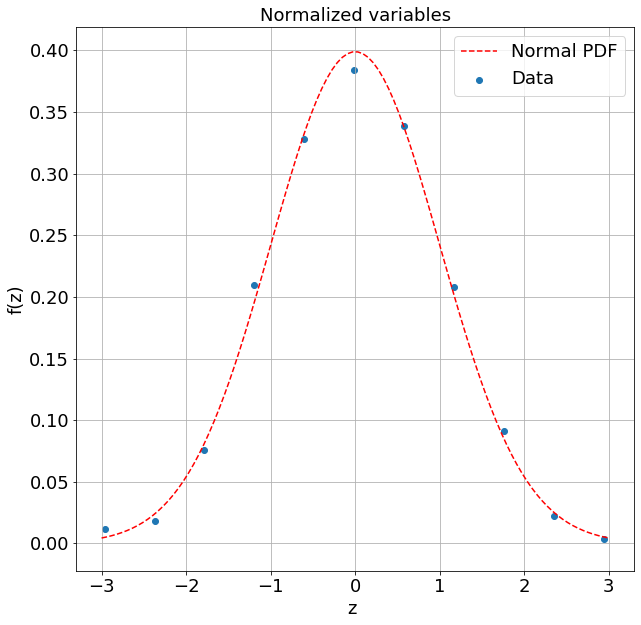

In [22]:
zcont = np.linspace(-3, 3, 100)
Normf = (1 / np.sqrt(2 * np.pi)) * np.exp((-(zcont) **2) / 2)

pyplot.figure(figsize=(10, 10))
pyplot.grid(True)
pyplot.scatter(zvalues, fzvalues, label = 'Data')
pyplot.plot(zcont, Normf, label = 'Normal PDF', linestyle = '--', color = 'r')
pyplot.ylabel('f(z)', fontsize=font)
pyplot.xlabel('z ', fontsize=font)
pyplot.title('Normalized variables', fontsize=font);
pyplot.legend(loc = 'best', fontsize=font)
pyplot.yticks(fontsize=font)
pyplot.xticks(fontsize=font);

This agreement indicates that  that **the errors are very nearly random**.

### Example

What is the probability that the temperature lies between the mean value and 33 degrees Celsius?

Normalize to obtain z:

\begin{align*}
\large
z = \frac { x - \mu }{\sigma} \approx \frac { x - \bar{x} }{S}
\end{align*}

In [23]:
Texample = 33
zexample = (Texample - Tmean)/ Stdeviation
print(np.round(zexample,3))

1.339


\begin{align*}
\large
A(z) = \frac{1}{2} \ erf(z \ / \sqrt{2})
\end{align*}

In [24]:
from scipy.special import erf

Aexample = 0.5 * erf(zexample / np.sqrt(2))
print(np.round(Aexample,6))

0.409659


In [25]:
Perres = np.round(Aexample,4)
print('This means that',Perres*100, '% of the measurements are predicted to lie between the mean',
      Tmean, 'and the given value', Texample)

This means that 40.97 % of the measurements are predicted to lie between the mean 31.009 and the given value 33


### Confidence level and level of significance

**Confidence level, c,** is defined as the probability that a random variable lies __within__ a specified range of values, called **confidence interval**.

**Level of significance, a,** is defined as the probability that a random variable lies __outside__ of a specified range of values.

For example, for confidence level $ c = 95 \% $ , the level of significance is $ \alpha = 1 - c = 5 \% $

Both $ \alpha $ and $c$ represent __probabilities__ or areas under the PDF curve.

![Confinte](img/img_00/Confinte.png)

# Student's t PDF


Similar to Gaussian PDF, but used for smaller sample sizes(usually when $n < 30 $ ).

When $ n $ is small, the sample mean and sample standard deviation may differ from the population mean and population standard deviation by some unknown amount.

Thus, $\mu$ is not known and with the student's t analysis we want to establish some confidence level in predicting $\mu$.

The student's t statistic is defined as 

\begin{align*}
\large
t = \frac {\bar{x} - \mu}{S /\sqrt{n}}
\end{align*}

\begin{align*}
\large
f(t,df) = \frac{\Gamma(\frac{df +1}{2})}{\sqrt{\pi df } \ \Gamma(\frac{df}{2})} \ {(1 + \frac{t^2}{df})}^{-(\frac{df+1}{2})}
\end{align*}

### Degrees of freedom , df

The number of measurements minus the minimum number of measurements necessary to estimate a statistic.

![studentt](img/img_00/studentt.png)

### Estimating the population mean with student's t PDF:

- For a specified confidence level, calculate the level of significance $\alpha = 1 - c$
- The range of t corresponding to this confidence level is $ -t_{\alpha / 2} < t \le t_{\alpha / 2}$

![trange](img/img_00/trange.png)

- The probability that t lies within the desired confidence level is 

\begin{align*}
\large
P(-t_{\alpha / 2} < t \le t_{\alpha / 2})= 1- \alpha
\end{align*}

and we know that 

\begin{align*}
\large
t = \frac {\bar{x} - \mu}{S /\sqrt{n}}
\end{align*}

Eventually,

\begin{align*}
\large
P  \bigg( \Big( \bar{x} - {t}_{a/2} \frac{S}{\sqrt{n} }\Big) \le \mu <  \Big( \bar{x} + {t}_{a/2} \frac{S}{\sqrt{n} }\Big)\bigg) = 1- \alpha
\end{align*}

State the final result as 

\begin{align*}
\large
\mu = \bar{x} \pm {t}_{a/2} \frac{S}{\sqrt{n} } 
\end{align*}

with a confidence level of $1 - \alpha$

In other words, we are confident to a $c= 1 - \alpha $ level that **the population mean lies within the calculated range.**

![ttable](img/img_00/ttable.png)

# The $ \chi^2  $ PDF


Used to estimate the confidence interval for the population variance $ \sigma ^ 2$, in similar fashion as student's t PDF is used to estimate the confidence interval for the population mean $\mu$.

Mathematically, the statistic $ \chi^2  $  is defined as, 

\begin{align*}
\large
\chi^2  = \frac{\sum_{i = 1}^{ n }\big(x_i - \mu\big)^{2}}{\sigma^2}
\end{align*}

comparing with the sample standard deviation definition

\begin{align*}
\large
S^2  = \frac{\sum_{i = 1}^{ n }\big(x_i - \bar{x}\big)^{2}}{n-1}
\end{align*}

there is a relationship between them, assuming $ \mu \approx \bar{x} $

\begin{align*}
\large
\chi^2  \approx(n - 1)\frac{S^2}{\sigma^2}
\end{align*}

The confidence interval for the variance is 

\begin{align*}
\large
\big( n - 1 \big) \frac{S^2}{{{\chi^2}_{\alpha / 2}}} \le  \sigma^2 \le    \big( n - 1 \big) \frac{S^2}{{{\chi^2}_{1 - \alpha / 2}}} 
\end{align*}

![chiplot](img/img_00/chiplot.png)


![chitable](img/img_00/chitable.png)

# References 

- McClave, J.T., Sincich, T., & Sincich, T.T.(2003).A first course in statistics.Pearson Education.
- Cimbala, J 2008, Basic Statistics,  Lecture notes, Instrumentation, Measurements, and Statistics ME 345, Penn State University.